In [35]:
import numpy as np
import pandas as pd

TEST_PATH = "../data/rocketskillshots_test.csv"
TRAIN_PATH = "../data/rocketskillshots_train.csv"

In [36]:
test = pd.read_csv(TEST_PATH)
train = pd.read_csv(TRAIN_PATH)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4137 non-null   int64  
 1   window_id              3959 non-null   float64
 2   BallAcceleration       4092 non-null   float64
 3   Time                   4137 non-null   float64
 4   DistanceWall           4044 non-null   float64
 5   DistanceCeil           4021 non-null   float64
 6   DistanceBall           1025 non-null   float64
 7   PlayerSpeed            4137 non-null   float64
 8   BallSpeed              4101 non-null   float64
 9   up                     4137 non-null   float64
 10  accelerate             4137 non-null   float64
 11  slow                   4137 non-null   int64  
 12  goal                   4137 non-null   int64  
 13  left                   4137 non-null   int64  
 14  boost                  4137 non-null   int64  
 15  came

In [38]:
train.describe()

,id,window_id,BallAcceleration,Time,DistanceWall,DistanceCeil,DistanceBall,PlayerSpeed,BallSpeed,up,...,slow_skew,goal_skew,left_skew,boost_skew,camera_skew,down_skew,right_skew,slide_skew,jump_skew,label
count,4137.000000,3959.000000,4092.000000,4137.000000,4044.000000,4021.000000,1025.000000,4137.000000,4101.000000,4137.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,4137.000000
mean,143.800822,12.901743,-3814.882875,2.021066,3780.541356,1695.130315,1081.380738,150372.747353,123900.647991,0.044356,...,3.715981,1.429127,0.900566,1.234661,2.054102,0.301251,-1.082963,1.188510,0.505992,3.355330
std,84.764944,10.064004,46389.387153,1.729769,13671.927555,540.974674,1535.020810,49072.150420,72183.192982,0.205468,...,2.179883,1.449590,1.791442,1.095091,1.133659,1.038343,1.697672,1.185207,1.151574,2.588084
min,0.000000,0.000000,-298303.227932,0.000000,0.000000,0.070000,129.800236,27.037012,0.000000,0.000000,...,0.000000,-0.388403,0.000000,-1.460988,0.000000,0.000000,-6.244998,-1.778781,-1.922718,-1.000000
25%,70.000000,5.000000,-1846.379236,0.731333,1219.250000,1473.770000,234.093144,122054.835787,87607.044272,0.000000,...,3.353494,0.000000,0.000000,0.413344,1.378895,0.000000,-2.051729,0.304167,-0.144115,1.000000
50%,146.000000,11.000000,0.000000,1.598579,3154.400000,1976.270000,429.132909,148003.167986,129003.890178,0.000000,...,4.358899,1.396973,0.000000,1.171513,1.965585,0.000000,0.000000,1.055094,0.281842,3.000000
75%,214.000000,18.000000,985.247663,2.887900,3765.137500,2013.000000,929.411923,185378.187706,168797.513992,0.000000,...,5.000000,2.277580,0.000000,1.773180,2.686455,0.000000,0.000000,1.919636,0.945984,6.000000
max,297.000000,63.000000,287269.750948,13.470363,223799.815054,4039.970000,9194.156158,229999.958811,309832.164910,1.000000,...,8.000000,6.708204,7.000000,5.000000,6.557439,5.567764,0.946212,4.898979,5.656854,7.000000


In [39]:
train.isna().sum()

id                          0
window_id                 178
BallAcceleration           45
Time                        0
DistanceWall               93
DistanceCeil              116
DistanceBall             3112
PlayerSpeed                 0
BallSpeed                  36
up                          0
accelerate                  0
slow                        0
goal                        0
left                        0
boost                       0
camera                      0
down                        0
right                       0
slide                       0
jump                        0
BallAcceleration_skew    3959
Time_skew                3959
DistanceWall_skew        3959
DistanceCeil_skew        3959
DistanceBall_skew        3959
PlayerSpeed_skew         3959
BallSpeed_skew           3959
up_skew                  3959
accelerate_skew          3959
slow_skew                3959
goal_skew                3959
left_skew                3959
boost_skew               3959
camera_ske

In [40]:
train.columns

Index(['id', 'window_id', 'BallAcceleration', 'Time', 'DistanceWall',
       'DistanceCeil', 'DistanceBall', 'PlayerSpeed', 'BallSpeed', 'up',
       'accelerate', 'slow', 'goal', 'left', 'boost', 'camera', 'down',
       'right', 'slide', 'jump', 'BallAcceleration_skew', 'Time_skew',
       'DistanceWall_skew', 'DistanceCeil_skew', 'DistanceBall_skew',
       'PlayerSpeed_skew', 'BallSpeed_skew', 'up_skew', 'accelerate_skew',
       'slow_skew', 'goal_skew', 'left_skew', 'boost_skew', 'camera_skew',
       'down_skew', 'right_skew', 'slide_skew', 'jump_skew', 'label'],
      dtype='object')

In [41]:
train["label"].value_counts()

label
 5    891
 2    736
 6    714
-1    570
 1    511
 7    396
 3    319
Name: count, dtype: int64

<Axes: >

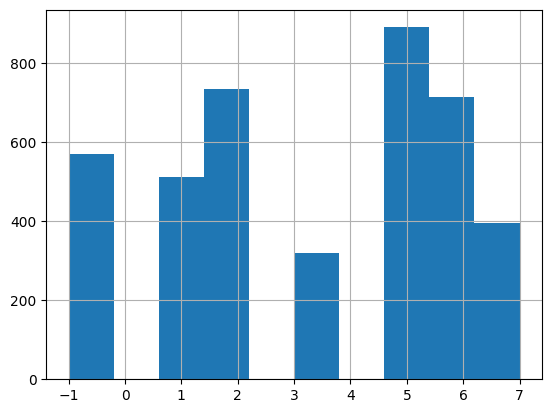

In [42]:
train['label'].hist()

In [55]:
len(train['id'].value_counts())

178

In [59]:
train.groupby('id')['label'].value_counts()

id   label
0     6       33
2    -1       35
4    -1       23
11    1       23
13    6       24
              ..
292  -1       27
294  -1       21
295  -1       12
296  -1       18
297  -1       16
Name: count, Length: 178, dtype: int64

In [54]:
train.groupby('id').size()

id
0      33
2      35
4      23
11     23
13     24
       ..
292    27
294    21
295    12
296    18
297    16
Length: 178, dtype: int64

<Axes: >

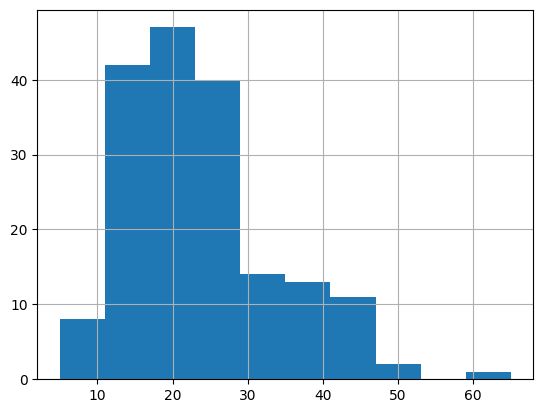

In [49]:
train.groupby('id').size().hist()

In [61]:
train['right'].describe()

count    4137.000000
mean        0.924583
std         0.264095
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: right, dtype: float64